# Exploratory Data Analysis
## Rancang Bangun Jaringan Saraf Tiruan untuk Sistem Kendali Lingkungan

Ridhan Fadhilah
15/384859/TK/43521

### 1. Mengimpor pustaka yang diperlukan untuk EDA

In [1]:
# Mengimpor pustaka-pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

### 2. Memuat data ke dalam DataFrame.

In [9]:
# # Menampilkan berkas-berkas data
# from subprocess import check_output
# print(check_output(["ls", "Data"]).decode("utf8"))

In [10]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('Data/dataAll.xlsx')

In [11]:
# Menampilkan 5 data teratas
data.head()

,No,Variation,Month,Time,Heater,AC,To,Radiation,Td,RH
0,1,DT001,Mar,00:03:00,0,0,24.08,0.0,24.03,70.64
1,2,DT001,Mar,00:09:00,0,0,24.08,0.0,24.03,70.72
2,3,DT001,Mar,00:15:00,0,0,24.08,0.0,24.04,70.81
3,4,DT001,Mar,00:21:00,0,0,24.08,0.0,24.04,70.90
4,5,DT001,Mar,00:27:00,0,0,24.08,0.0,24.04,70.99


In [12]:
# Menampilkan 5 data terbawah
data.tail()

,No,Variation,Month,Time,Heater,AC,To,Radiation,Td,RH
23995,23996,DT100,Des,23:33:00,2,0,24.22,0.0,24.89,99.69
23996,23997,DT100,Des,23:39:00,2,0,24.22,0.0,24.87,99.69
23997,23998,DT100,Des,23:45:00,2,0,24.22,0.0,24.86,99.69
23998,23999,DT100,Des,23:51:00,2,0,24.22,0.0,24.85,99.69
23999,24000,DT100,Des,23:57:00,2,0,24.22,0.0,24.83,99.69


### 3. Memeriksa tipe data

In [13]:
# Memeriksa tipe data
data.dtypes

No             int64
Variation     object
Month         object
Time          object
Heater         int64
AC             int64
To           float64
Radiation    float64
Td           float64
RH           float64
dtype: object

### 4. Membuang (drop) kolom yang tidak relevan

In [14]:
# Menghilangkan kolom yang tidak relevan
data = data.drop(['No'], axis=1)

### 5. Mengganti nama kolom

In [15]:
# # Mengganti nama kolom
# data = data.rename(columns={'No': 'Nomor', 'Heater': 'Pemanas'})

### 6. Membuang (drop)  baris duplikat

In [16]:
# Total number of rows and columns
data.shape

(24000, 9)

In [17]:
# Baris-baris yang mengandung data duplikat
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [18]:
# Biasakan menghitung jumlah baris sebelumnya menghapus datanya
data.count() 

Variation    24000
Month        24000
Time         24000
Heater       24000
AC           24000
To           24000
Radiation    24000
Td           24000
RH           24000
dtype: int64

In [19]:
# # Membuang (drop) data duplikat 
# data = df.drop_duplicates()

### 7. Membuang (drop) nilai-nilai yang hilang atau null.

In [20]:
# Mencari nilai-nilai kosong (null)
print(data.isnull().sum())

Variation    0
Month        0
Time         0
Heater       0
AC           0
To           0
Radiation    0
Td           0
RH           0
dtype: int64


In [21]:
# # Membuang nilai-nilai yang hilang.
# df = df.dropna() 

### 8. Mendeteksi Outliers

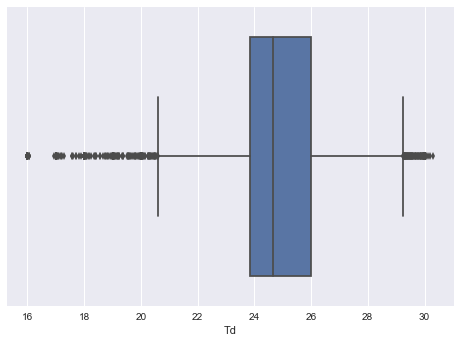

In [23]:
sns.boxplot(x=data['Td'])

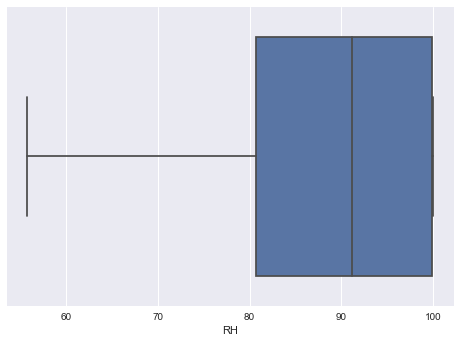

In [24]:
sns.boxplot(x=data['RH'])

In [25]:
data.describe()

,Heater,AC,To,Radiation,Td,RH
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.600000,9.362500,25.269598,184.437794,24.528928,89.147813
std,0.800017,12.373357,1.825458,270.431525,2.489437,10.545183
min,0.000000,0.000000,13.130000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.940000,0.000000,23.840000,80.680000
50%,0.000000,0.000000,24.680000,0.000000,24.660000,91.180000
75%,1.000000,24.000000,26.840000,291.576000,26.000000,99.870000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


In [26]:
# Menentukan nilai IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Heater         1.000
AC            24.000
To             2.900
Radiation    291.576
Td             2.160
RH            19.190
dtype: float64


In [27]:
# # Membuang Outliers
# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data.shape

In [28]:
data.describe()

,Heater,AC,To,Radiation,Td,RH
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.600000,9.362500,25.269598,184.437794,24.528928,89.147813
std,0.800017,12.373357,1.825458,270.431525,2.489437,10.545183
min,0.000000,0.000000,13.130000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.940000,0.000000,23.840000,80.680000
50%,0.000000,0.000000,24.680000,0.000000,24.660000,91.180000
75%,1.000000,24.000000,26.840000,291.576000,26.000000,99.870000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


In [29]:
# # Membuang AC bernilai 0
# data = data[data.AC != 0]

In [30]:
data.describe()

,Heater,AC,To,Radiation,Td,RH
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.600000,9.362500,25.269598,184.437794,24.528928,89.147813
std,0.800017,12.373357,1.825458,270.431525,2.489437,10.545183
min,0.000000,0.000000,13.130000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.940000,0.000000,23.840000,80.680000
50%,0.000000,0.000000,24.680000,0.000000,24.660000,91.180000
75%,1.000000,24.000000,26.840000,291.576000,26.000000,99.870000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


### 9. Plot berbagai fitur terhadap satu sama lain (scatter), terhadap frekuensi (histogram)

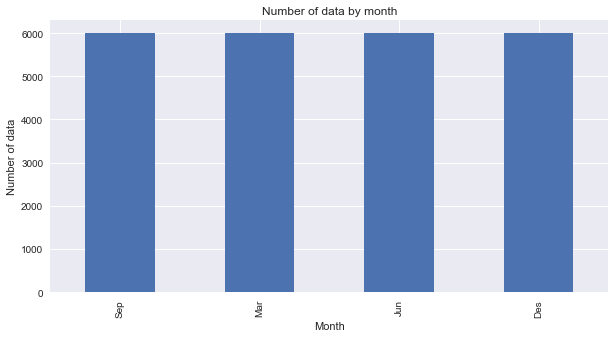

In [31]:
# Menggambar Histogram
data.Month.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of data by month")
plt.ylabel('Number of data')
plt.xlabel('Month');

In [32]:
# Mencari relasi anatara variabel-variabel.
c = pd.DataFrame(data.corr())
c

,Heater,AC,To,Radiation,Td,RH
Heater,1.000000,0.066424,0.000642,-0.000275,0.415039,-0.108863
AC,0.066424,1.000000,0.707403,0.781426,0.060352,0.035544
To,0.000642,0.707403,1.000000,0.744093,0.057839,-0.107750
Radiation,-0.000275,0.781426,0.744093,1.000000,-0.039498,0.016874
Td,0.415039,0.060352,0.057839,-0.039498,1.000000,-0.385537
RH,-0.108863,0.035544,-0.107750,0.016874,-0.385537,1.000000


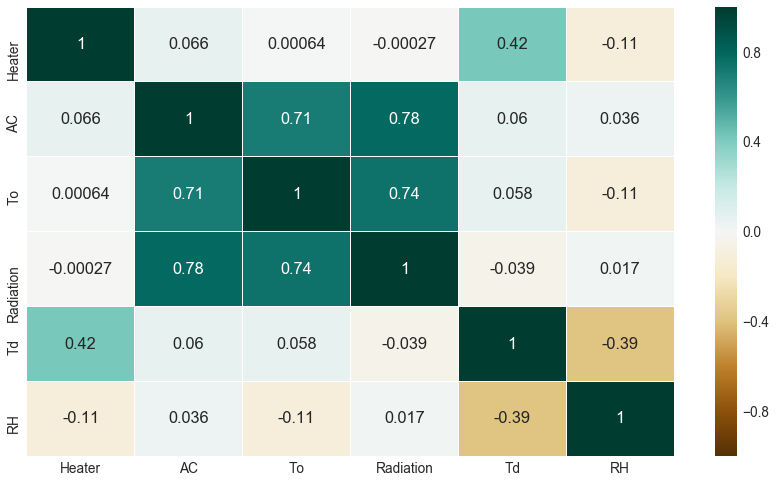

In [33]:
# Heatmaps
sns.set_style('white')
sns.set_context("paper", font_scale=1.7) 
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap="BrBG",annot=True, linewidths=0.1)
plt.tight_layout()

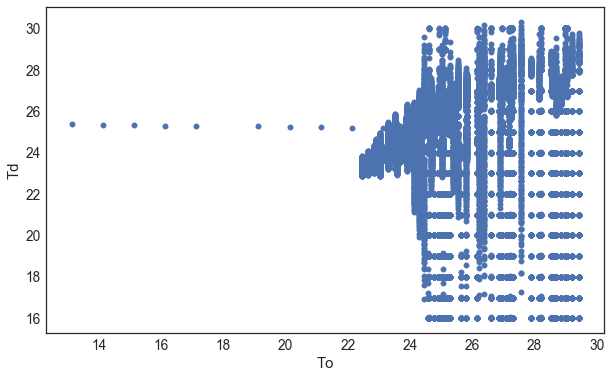

In [36]:
# Menggambar scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['To'], data['Td'])
ax.set_xlabel('To')
ax.set_ylabel('Td')
plt.show()

## Uji Distribusi dan Normalitas

In [37]:
print(data.AirT.describe())

sns.distplot(data.T);

stats.normaltest(data.AirT)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AirT)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AirT)))

AttributeError: 'DataFrame' object has no attribute 'AirT'

KURTOSIS: menggambarkan bobot ekor suatu distribusi

Distribusi Normal memiliki kurtosis 0 (mesokurtik) <br/>
Nilai positif memberi tahu Anda bahwa Anda memiliki ekor yang berat (mis. Banyak data di ekor Anda). <br/>
Nilai negatif berarti Anda memiliki ekor ringan (mis. Sedikit data di ekor Anda). <br/>

SKEWNESS:

Jika kemiringan kurang dari -1 atau lebih besar dari 1, distribusinya sangat miring. <br/>
Jika kemiringan antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya cukup miring. <br/>
Jika kemiringan antara -0,5 dan 0,5, distribusinya kira-kira simetris. <br/>

In [ ]:
print(data.RH.describe())

sns.distplot(data.RH);

stats.normaltest(data.RH)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.RH)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.RH)))

In [ ]:
print(data.AC.describe())

sns.distplot(data.AC);

stats.normaltest(data.AC)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AC)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AC)))